# Final Exam for Valentin PICAVET ID : 73161

# Preliminary Work

## Load Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math as m

# Exercise 1 : Maximum Time Under Water

*1) Calculating the first hitting index for a pandas series*

With a for loop I go over all the rows of the Pandas Series and the first time that my condition is True I return the index.
If my condition is never True I return an empty list.

In [2]:
def first_hitting(df: pd.Series,x):
    for i in range(df.size):   
        if df[i]>=x: 
            return (df.index[i]) 
    return [] 

*2) Calculating the 'longest period under water' and the duration in days of that period*

In this code, I iterate through the Series and keep track of the current and longest periods under water. When a new high watermark is reached, I update the current period's start date. If a new high watermark is reached while a current period under water is ongoing, I calculate the duration of that period and compare it to the longest one found so far. When the iteration is complete, the function returns the start date, end date, and duration of the longest period under water.

In [3]:
def longest_period_under_water(series):
    longest_start_date = None
    longest_end_date = None
    longest_duration = pd.Timedelta(0)
    current_start_date = None
    current_end_date = None
    current_duration = pd.Timedelta(0)
    high_watermark = series[0]
    
    for date, value in series.items():
        if value >= high_watermark:
            high_watermark = value
            current_start_date = date
            current_end_date = None
            current_duration = pd.Timedelta(0)
        elif current_start_date is not None:
            current_duration = date - current_start_date
            current_end_date = date
            if current_duration > longest_duration:
                longest_start_date = current_start_date
                longest_end_date = current_end_date
                longest_duration = current_duration

    return series.name, longest_start_date, longest_end_date, longest_duration

*3) Find the longest periods under water for the 6 funds*

First I download the 6 funds from the csv file. I set `parse_dates=[0]` and `dayfirst=False` in order to have the index dates in the good type.

In [4]:
funds = pd.read_csv("funds.csv", index_col=0, parse_dates=[0], dayfirst=False)
funds

,BlackRock Multi-Asset Income Portfolio,iShares iBoxx $ High Yield Corporate Bond ETF,BlackRock Equity Dividend Fund,iShares 20+ Year Treasury Bond ETF,Vanguard Equity-Income Fund Investor Shares,Cash
2018-01-02,8.489755,66.994629,12.966429,112.028168,26.493795,21.902108
2018-01-03,8.520377,67.316780,13.011883,112.563812,26.571800,21.902960
2018-01-04,8.543343,67.431885,13.102796,112.545944,26.678167,21.903812
2018-01-05,8.551001,67.477905,13.170979,112.224556,26.805815,21.904663
2018-01-08,8.558652,67.424225,13.148252,112.153168,26.841272,21.907218
...,...,...,...,...,...,...
2023-03-27,9.521506,72.771469,17.823668,103.814133,38.150002,23.531225
2023-03-28,9.531456,72.731819,17.853539,104.003174,38.240002,23.534337
2023-03-29,9.581203,73.643700,18.052685,103.794228,38.680000,23.537449
2023-03-30,9.621000,74.079811,18.142302,104.271820,38.849998,23.540561


I want to use my function from question 2 but it was for a pandas series and not for a pandas Data Frame so I use the the python `map` function to apply my question 2 function to each item in the funds Data Frame.

In [5]:
def apply_under_water(df : pd.DataFrame):
    return list(map(lambda i: longest_period_under_water(df[i]),df.columns))

In [6]:
apply_under_water(funds)

[('BlackRock Multi-Asset Income Portfolio',
  Timestamp('2022-01-04 00:00:00'),
  Timestamp('2023-03-31 00:00:00'),
  Timedelta('451 days 00:00:00')),
 ('iShares iBoxx $ High Yield Corporate Bond ETF',
  Timestamp('2021-12-27 00:00:00'),
  Timestamp('2023-03-31 00:00:00'),
  Timedelta('459 days 00:00:00')),
 ('BlackRock Equity Dividend Fund',
  Timestamp('2022-04-20 00:00:00'),
  Timestamp('2023-03-31 00:00:00'),
  Timedelta('345 days 00:00:00')),
 ('iShares 20+ Year Treasury Bond ETF',
  Timestamp('2020-08-04 00:00:00'),
  Timestamp('2023-03-31 00:00:00'),
  Timedelta('969 days 00:00:00')),
 ('Vanguard Equity-Income Fund Investor Shares',
  Timestamp('2018-01-26 00:00:00'),
  Timestamp('2019-04-04 00:00:00'),
  Timedelta('433 days 00:00:00')),
 ('Cash', None, None, Timedelta('0 days 00:00:00'))]

# Exercise 2 : Factor Based Covariance Matrix

*1) Import the weekly factor values and the daily portfolio returns*

I download weekly factor values and the daily portfolio returns from the online data library of Ken French. For the Factor values,
I skip the first 3 rows to only condsider the relevant data. For the Portfolio returns, I decided to work on the Average Value
Value Weighted Returns, so I skip the first 18 rows and modified the csv file accordingly.
I set `parse_dates=[0]` and `dayfirst=False` to have the index dates with the good type.

In [7]:
fac_all = pd.read_csv('F-F_Research_Data_Factors_weekly.csv', delimiter=',', index_col=0, skiprows=3, parse_dates=[0],dayfirst=False)
df2 = pd.read_csv("100_Portfolios_10x10_Daily.csv", skiprows=18, delimiter=',' , index_col=0, parse_dates=[0],dayfirst=False)
df2

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7,ME10 BM8,ME10 BM9,BIG HiBM
1926-07-01,-99.99,0.00,-99.99,1.59,-3.08,4.64,2.57,3.81,-0.52,-0.84,...,0.03,1.10,-0.15,-0.03,0.52,0.48,-0.43,-0.08,0.17,-99.99
1926-07-02,-99.99,-0.27,-99.99,0.00,-0.97,-4.10,0.31,-0.47,2.74,-0.27,...,0.31,0.71,0.97,0.57,0.52,0.15,0.63,-0.04,0.34,-99.99
1926-07-06,-99.99,1.01,-99.99,-4.69,2.35,-1.79,0.00,2.44,-5.18,-0.23,...,0.49,-0.19,0.89,0.31,-0.12,-0.18,-0.33,-0.40,-0.34,-99.99
1926-07-07,-99.99,-1.67,-99.99,4.92,0.51,5.27,0.00,-0.74,-0.24,-0.02,...,-0.20,-0.01,0.66,0.38,0.03,0.25,-0.29,0.52,0.17,-99.99
1926-07-08,-99.99,0.00,-99.99,1.56,-0.51,-1.06,0.00,4.90,0.45,0.26,...,0.56,-0.12,0.35,0.55,-0.14,0.19,-0.12,0.54,0.51,-99.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25,-1.40,-1.65,-0.37,-0.31,-1.31,-0.56,-1.57,0.26,-0.08,-1.39,...,0.64,0.19,0.41,0.13,0.83,-0.71,-0.73,-1.00,-0.92,-2.11
2023-07-26,1.03,0.63,1.89,0.86,0.43,0.80,1.20,1.25,1.69,1.65,...,-0.81,-0.21,3.08,0.03,0.03,-0.42,0.58,0.61,1.13,0.59
2023-07-27,-1.93,-0.84,-1.82,-1.45,-2.58,-2.65,-1.71,-1.85,-0.69,-1.28,...,-0.97,-0.48,-0.40,-1.89,1.05,0.17,-0.59,-2.55,-0.27,0.90
2023-07-28,2.16,1.23,2.52,2.81,3.43,2.32,1.81,1.87,1.92,2.17,...,1.53,1.25,1.65,0.05,1.09,0.97,0.39,-0.41,0.97,-0.98


*2) Eliminate from the investment universe the portfolio that have at least one missing return
(represented as -99.99 in the data) between January 2, 1970 and July 28, 2023.*

I consider the DataFrame made of observations between January 2, 1970 and July 28, 2023, I test if the return is less than -99, and I sum the test results across rows.

In [8]:
count_m99 = (df2.loc["1970-01-02":"2023-07-28"] < -99).sum()
count_m99

SMALL LoBM       0
ME1 BM2          0
ME1 BM3          0
ME1 BM4          0
ME1 BM5          0
              ... 
ME10 BM6         0
ME10 BM7         0
ME10 BM8       508
ME10 BM9       505
BIG HiBM      2103
Length: 100, dtype: int64

Then, I define `universe_return` to be the DataFrame made of returns between January 2, 1970 and July 28, 2023, keeping only the portfolios that do not have missing returns after that date.

In [9]:
universe_return = df2[df2.columns[count_m99 == 0]].loc["1970-01-02":"2023-07-28"]
universe_return

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
1970-01-02,5.34,3.66,4.81,3.37,3.70,4.44,5.11,2.35,3.04,3.15,...,2.41,2.31,3.89,-0.07,1.33,-0.09,0.92,2.12,1.02,0.78
1970-01-05,2.17,2.10,3.24,1.92,2.42,1.49,2.63,2.54,2.55,2.07,...,1.12,1.42,1.60,0.37,-0.03,-0.15,1.06,-0.18,1.03,0.81
1970-01-06,-0.93,-0.96,-0.42,-0.78,-0.28,0.17,-0.13,-0.28,-0.46,0.06,...,-0.99,-1.10,-0.85,-0.39,-0.59,-1.00,-0.89,-0.64,-1.47,-0.78
1970-01-07,1.24,0.53,1.37,0.70,0.67,0.22,1.20,0.34,0.34,0.74,...,0.01,-0.32,-0.29,0.11,-0.18,0.07,-0.83,-0.34,-0.41,-0.48
1970-01-08,0.94,0.91,0.03,1.01,0.21,0.44,0.73,0.20,0.13,0.65,...,-0.15,0.07,-0.17,0.38,0.11,0.02,-0.67,-0.14,-0.28,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,-2.30,-0.74,-0.90,-2.32,-1.23,-1.70,0.42,0.42,1.30,-0.43,...,1.06,1.02,-2.47,0.49,-0.11,0.69,1.10,0.26,0.45,1.09
2023-07-25,-1.40,-1.65,-0.37,-0.31,-1.31,-0.56,-1.57,0.26,-0.08,-1.39,...,-0.08,-1.06,-0.63,0.64,0.19,0.41,0.13,0.83,-0.71,-0.73
2023-07-26,1.03,0.63,1.89,0.86,0.43,0.80,1.20,1.25,1.69,1.65,...,0.35,1.14,1.84,-0.81,-0.21,3.08,0.03,0.03,-0.42,0.58
2023-07-27,-1.93,-0.84,-1.82,-1.45,-2.58,-2.65,-1.71,-1.85,-0.69,-1.28,...,-0.68,-1.71,-3.68,-0.97,-0.48,-0.40,-1.89,1.05,0.17,-0.59


After eliminating the portfolios that have missing returns, the universe contains 96 portfolios.

*3) Calculate the daily portfolio values assuming an initial value of $1 on January 2, 1970*

I define `universe_values` to be the DataFrame made of daily values. I use the function `np.cumprod` to return the cumulative product of elements of each rows of `universe_return` and I divide the returns by 100 because they are not in % in the DataFrame.

In [10]:
universe_values=np.cumprod(1+universe_return/100)
universe_values

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
1970-01-02,1.053400,1.036600,1.048100,1.033700,1.037000,1.044400,1.051100,1.023500,1.030400,1.031500,...,1.024100,1.023100,1.038900,0.999300,1.013300,0.999100,1.009200,1.021200,1.010200,1.007800
1970-01-05,1.076259,1.058369,1.082058,1.053547,1.062095,1.059962,1.078744,1.049497,1.056675,1.052852,...,1.035570,1.037628,1.055522,1.002997,1.012996,0.997601,1.019898,1.019362,1.020605,1.015963
1970-01-06,1.066250,1.048208,1.077514,1.045329,1.059122,1.061763,1.077342,1.046558,1.051814,1.053484,...,1.025318,1.026214,1.046550,0.999086,1.007019,0.987625,1.010820,1.012838,1.005602,1.008039
1970-01-07,1.079471,1.053764,1.092276,1.052647,1.066218,1.064099,1.090270,1.050117,1.055391,1.061280,...,1.025420,1.022930,1.043515,1.000185,1.005207,0.988317,1.002431,1.009394,1.001479,1.003200
1970-01-08,1.089618,1.063353,1.092603,1.063278,1.068457,1.068781,1.098229,1.052217,1.056763,1.068178,...,1.023882,1.023646,1.041741,1.003985,1.006312,0.988514,0.995714,1.007981,0.998675,1.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,0.244892,16.954630,75.168852,93.124455,210.429426,341.491439,819.988606,782.829943,2468.362326,2147.689348,...,151.161664,727.325425,105.619906,162.692443,403.613752,273.864484,319.019427,153.785279,445.822914,32.355912
2023-07-25,0.241463,16.674879,74.890727,92.835769,207.672800,339.579087,807.114784,784.865301,2466.387636,2117.836466,...,151.040735,719.615776,104.954501,163.733675,404.380618,274.987328,319.434152,155.061697,442.657571,32.119714
2023-07-26,0.243950,16.779931,76.306162,93.634157,208.565793,342.295720,816.800162,794.676117,2508.069587,2152.780768,...,151.569378,727.819396,106.885664,162.407432,403.531419,283.456938,319.529983,155.108216,440.798409,32.306008
2023-07-27,0.239242,16.638979,74.917390,92.276462,203.184796,333.224883,802.832879,779.974609,2490.763907,2125.225174,...,150.538706,715.373684,102.952271,160.832080,401.594468,282.323110,313.490866,156.736852,441.547766,32.115403


*4) From the daily portfolio values, I calculate the weekly portfolio returns over the same weeks as in the factor dataset.*

I define `weekly_universe_return` to be the DataFrame made of weekly returns.

I initialize l1 being the list that takes the dates from the Factor DataFrame and l2 the list that takes the dates from the 
daily values DataFrame that I calculated just before. I go all over the dates in the daily values DataFrame, and if the date is
in the Weekly Factor DataFrame then I keep it, otherwise I set the value to a default value being 0.
Then I delete the rows that I dont want to keep (having value 0). Finally, I use the function `pct_change` to compute the weekly returns.

In [11]:
weekly_universe_return=universe_values.copy()
l1=list(fac_all.index)
l2=list(weekly_universe_return.index)
for i in l2:
    x=l2.index(i)
    if i not in l1:
        weekly_universe_return.iloc[x]=0

weekly_universe_return=weekly_universe_return.loc[weekly_universe_return['ME1 BM9']!=0]
weekly_universe_return=weekly_universe_return.pct_change()
weekly_universe_return

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,ME1 BM5,ME1 BM6,ME1 BM7,ME1 BM8,ME1 BM9,SMALL HiBM,...,ME9 BM8,ME9 BM9,ME9 BM10,BIG LoBM,ME10 BM2,ME10 BM3,ME10 BM4,ME10 BM5,ME10 BM6,ME10 BM7
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-09,0.031796,0.027655,0.035685,0.025220,0.029304,0.020787,0.037837,0.029805,0.024149,0.035661,...,-0.002412,-0.002968,-0.001376,0.005292,-0.007293,-0.016136,-0.018592,-0.017485,-0.031082,-0.005062
1970-01-16,-0.015258,-0.029384,-0.029480,-0.033742,-0.017554,-0.016339,-0.042613,-0.020226,-0.014835,-0.010470,...,-0.026729,-0.030440,-0.022244,-0.002597,-0.016025,-0.003335,-0.013893,-0.026941,-0.032872,-0.021724
1970-01-23,-0.012650,-0.010300,-0.014084,-0.002581,-0.026777,-0.012035,-0.014454,-0.005561,-0.012658,-0.006017,...,-0.005011,0.006010,0.000551,-0.037102,-0.009586,-0.021845,-0.024583,-0.008343,-0.018739,-0.026157
1970-01-30,-0.046885,-0.060140,-0.057800,-0.038608,-0.049756,-0.051404,-0.046433,-0.046143,-0.036619,-0.025736,...,-0.045612,-0.061167,-0.031281,-0.056894,-0.052965,-0.028781,-0.058693,-0.039594,-0.062653,-0.054100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,0.023503,0.030219,0.002679,-0.027547,0.016772,0.009079,-0.038995,0.010365,0.010319,0.027163,...,0.026846,0.041122,0.031612,0.023893,0.007750,0.010541,-0.014422,0.021658,0.032119,0.032066
2023-07-07,0.009955,-0.020315,-0.002356,-0.004905,-0.006783,-0.019104,-0.000625,0.011427,0.006328,0.011024,...,0.010740,0.009464,-0.000014,-0.011271,-0.019290,-0.012171,-0.015348,-0.010497,-0.002561,-0.000171
2023-07-14,0.007599,0.012281,0.006901,0.003890,0.034300,0.026466,-0.001363,0.020926,0.021392,0.028531,...,0.005379,0.027694,-0.011163,0.025084,0.024520,0.037288,0.037868,0.029107,0.007548,0.014281
2023-07-21,0.017220,-0.002109,0.009454,0.013855,0.027115,0.011197,0.034404,0.048066,0.029126,0.032652,...,0.029249,0.010451,0.042726,-0.001450,0.015858,-0.008638,0.031841,-0.000478,0.010771,0.029402


*5) Write a function to return the factor-based covariance matrix estimate.*

The factor-based covariance matrix is calculated as $\hat{\sum}=\hat{\beta}'\hat{\sum}_F\hat{\beta}+\hat{\sum}_\varepsilon$

where $\hat{\sum}_\varepsilon$ is  the diagonal covariance matrix of estimated residual variances 

where the variance of the residuals is estimated as $\hat{\sigma}^2_{\varepsilon, i} = \frac{1}{{T - K - 1}} \sum_{{t=0}}^{{T-1}} \hat{\varepsilon}^2_{t+1, i}$

where $\mathbf{\Sigma}_F$ is the sample covariance matrix of factor values

where $\hat{\beta}$ is a 3 × 𝑁 matrix of estimated betas and $\hat{\beta}'$ is the transposed matrix

To estimate the different betas and residuals, I regress the weekly returns against the market, the size (SMB) and the value (HML) factors as per the following equation: 

$$
r_{t, t+1, i} = \alpha_i + \beta_{\text{MKT}, i} \cdot \text{MKT}_{t+1} + \beta_{\text{SMB}, i} \cdot \text{SMB}_{t+1} + \beta_{\text{HML}, i} \cdot \text{HML}_{t+1} + \varepsilon_{t+1, i}
$$


First, I rearrange my Factor DataFrame by selecting only the range of dates I want and by dropping the last column because this column does not appear in my above equation.

In [12]:
fac_all=fac_all.loc["1970-01-01":].drop(fac_all.columns[3],axis=1)
fac_all

,Mkt-RF,SMB,HML
1970-01-02,1.34,1.30,0.60
1970-01-09,-0.58,1.52,0.51
1970-01-16,-1.86,-0.60,-0.69
1970-01-23,-2.03,0.81,1.25
1970-01-30,-4.92,0.02,1.24
...,...,...,...
2023-06-30,2.36,0.58,0.35
2023-07-07,-1.23,-0.42,1.33
2023-07-14,2.53,1.38,-0.76
2023-07-21,0.64,-0.01,2.47


Then I write a code to run the regression. The python function `sm.add_constant` allows to add an intercept to the regressor in order to run the regression correctly.

Then I calculate the different elements I need. The python function `df_resid` returns the residual degree of freedom defined as the number of observations minus the rank of the regressor matrix which is exactly T-K-1.

In [13]:
def factor_based_cov(returns, factors):
    X= sm.add_constant(factors)
    regression = sm.OLS(returns, X).fit()
    beta = regression.params[1:]
    var_resid=(regression.resid**2).sum() / regression.df_resid
    covmatrixf=factors.cov() 
    sistematic=beta.T @ covmatrixf @ beta
    idiosyncratic=np.diag(var_resid)
    return sistematic+idiosyncratic

As the first row of `weekly_universe_return` is full of NaN , when using the `factor_based_cov` function I do not select the first row of the Factor and Weekly Returns DataFrame

In [14]:
a=factor_based_cov(weekly_universe_return.iloc[1:], fac_all.iloc[1:])
a

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.001247,0.000884,0.000896,0.000803,0.000762,0.000719,0.000691,0.000644,0.000621,0.000658,...,0.000471,0.000541,0.000645,0.000544,0.000508,0.000491,0.000500,0.000459,0.000448,0.000446
1,0.000884,0.001166,0.000835,0.000750,0.000713,0.000673,0.000648,0.000605,0.000584,0.000620,...,0.000451,0.000517,0.000618,0.000509,0.000477,0.000462,0.000473,0.000436,0.000428,0.000427
2,0.000896,0.000835,0.001114,0.000762,0.000724,0.000685,0.000661,0.000618,0.000597,0.000636,...,0.000464,0.000533,0.000639,0.000509,0.000480,0.000466,0.000479,0.000443,0.000438,0.000438
3,0.000803,0.000750,0.000762,0.000883,0.000656,0.000622,0.000603,0.000566,0.000548,0.000588,...,0.000442,0.000505,0.000610,0.000455,0.000435,0.000426,0.000442,0.000412,0.000413,0.000416
4,0.000762,0.000713,0.000724,0.000656,0.000836,0.000593,0.000575,0.000541,0.000523,0.000562,...,0.000429,0.000490,0.000592,0.000437,0.000418,0.000410,0.000427,0.000399,0.000401,0.000405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.000491,0.000462,0.000466,0.000426,0.000410,0.000389,0.000364,0.000354,0.000335,0.000363,...,0.000442,0.000490,0.000577,0.000521,0.000492,0.000577,0.000492,0.000470,0.000467,0.000473
92,0.000500,0.000473,0.000479,0.000442,0.000427,0.000407,0.000386,0.000377,0.000359,0.000394,...,0.000482,0.000534,0.000635,0.000524,0.000502,0.000492,0.000652,0.000494,0.000499,0.000509
93,0.000459,0.000436,0.000443,0.000412,0.000399,0.000383,0.000365,0.000360,0.000343,0.000380,...,0.000476,0.000527,0.000632,0.000492,0.000476,0.000470,0.000494,0.000637,0.000489,0.000501
94,0.000448,0.000428,0.000438,0.000413,0.000401,0.000388,0.000376,0.000374,0.000358,0.000403,...,0.000507,0.000561,0.000681,0.000471,0.000467,0.000467,0.000499,0.000489,0.000689,0.000526


*6) Calculate the GMV portfolio with the following two covariance matrix estimates: the sample
covariance matrix estimated from January 1, 2021 to January 1, 2023, and the factor-based matrix
estimated over the same period*

To compute the GMV portfolio, I use the following formula that you provided by email:

$$
\text{W}_{GMV} = \frac{{\Sigma^{-1} \cdot 1}}{x}
$$

where $\Sigma$ is the (estimated) covariance matrix, 1 is a column vector of ones with length equal to the number of constituents, and the denominator x is the sum of the elements of the vector $\Sigma^{-1} \cdot 1$, so that weights add up to 1.

I use the python function `np.linalg.inv` to compute $\Sigma^{-1}$ and `np.dot` to compute $\Sigma^{-1} \cdot 1$

In [15]:
def gmv(matrix):
    l=len(matrix)
    vector_ones=np.ones(l)
    matrix_inv =np.linalg.inv(matrix)
    numerator=np.dot(matrix_inv, vector_ones)
    weights = numerator / np.sum(numerator)
    return weights

I calculate  the sample covariance matrix from weekly returns estimated from January 1, 2021 to January 1, 2023

In [16]:
gmv_sample=gmv(weekly_universe_return.loc["2021-01-01":"2023-01-01"].cov())
gmv_sample

array([ 0.39535157,  0.06032745, -0.23684109, -0.4224395 , -0.17817013,
       -0.55287409,  0.22426592,  0.25071552,  1.10126366, -0.45402908,
        0.12874296, -0.20420315, -0.24405863,  0.24663127, -0.04811776,
       -0.51435495,  0.21229725,  0.29098174,  1.03162258,  0.09186024,
       -0.2700888 ,  0.31578772,  0.06826835,  0.28961809,  0.21125386,
        0.40608374, -0.39903279,  0.45628796, -0.54704887,  0.16754408,
        0.21626888, -0.21848369,  0.02982243, -0.27817184, -1.73353378,
        0.29060991, -0.32264417, -0.30327564, -0.18229986,  0.31892618,
       -0.03400441,  0.25982238,  0.9284994 , -0.36964761, -0.52411921,
        0.3191048 ,  0.47000949,  0.41874914, -0.52363523, -0.64897134,
       -0.22059969, -0.75084957,  0.01282635,  0.17564827,  1.22345772,
        0.58089268, -0.08025768, -0.19186465, -0.39388938, -0.38270938,
       -0.7203465 , -1.16590983,  1.83960644,  0.43432154,  0.09300083,
       -1.16190473, -0.33108132,  0.24169636, -0.15204141,  1.55

For the factor-based covariance matrix, firstly I use my function from question 5) to calculate the factor-based covariance matrix estimate from January 1, 2021 to January 1, 2023.

In [17]:
x=factor_based_cov(weekly_universe_return.loc["2021-01-01":"2023-01-01"], fac_all.loc["2021-01-01":"2023-01-01"])
x

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.003448,0.002369,0.002431,0.001915,0.002192,0.001824,0.001557,0.001356,0.000997,0.001117,...,0.000608,0.000729,0.000740,0.001089,0.000804,0.000754,0.000582,0.000548,0.000669,0.000538
1,0.002369,0.003474,0.002329,0.001842,0.002114,0.001765,0.001513,0.001324,0.000981,0.001110,...,0.000606,0.000726,0.000729,0.000998,0.000744,0.000694,0.000550,0.000525,0.000652,0.000534
2,0.002431,0.002329,0.003272,0.001901,0.002168,0.001800,0.001542,0.001343,0.000985,0.001091,...,0.000636,0.000760,0.000787,0.001179,0.000869,0.000820,0.000622,0.000591,0.000709,0.000575
3,0.001915,0.001842,0.001901,0.002128,0.001720,0.001434,0.001243,0.001092,0.000813,0.000912,...,0.000561,0.000667,0.000686,0.000915,0.000686,0.000644,0.000504,0.000494,0.000606,0.000511
4,0.002192,0.002114,0.002168,0.001720,0.003001,0.001647,0.001430,0.001259,0.000941,0.001063,...,0.000645,0.000768,0.000783,0.001003,0.000757,0.000708,0.000564,0.000555,0.000690,0.000584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.000754,0.000694,0.000820,0.000644,0.000708,0.000581,0.000539,0.000482,0.000359,0.000369,...,0.000425,0.000494,0.000566,0.000763,0.000576,0.000635,0.000403,0.000422,0.000484,0.000439
92,0.000582,0.000550,0.000622,0.000504,0.000564,0.000472,0.000457,0.000421,0.000330,0.000363,...,0.000402,0.000466,0.000514,0.000536,0.000423,0.000403,0.000452,0.000350,0.000426,0.000406
93,0.000548,0.000525,0.000591,0.000494,0.000555,0.000472,0.000482,0.000456,0.000373,0.000422,...,0.000498,0.000576,0.000628,0.000544,0.000447,0.000422,0.000350,0.000559,0.000511,0.000505
94,0.000669,0.000652,0.000709,0.000606,0.000690,0.000595,0.000620,0.000595,0.000498,0.000580,...,0.000663,0.000767,0.000822,0.000608,0.000518,0.000484,0.000426,0.000511,0.000865,0.000666


Then I calculate the GMV portfolio for the factor-based covariance matrix from January 1, 2021 to January 1, 2023.

In [18]:
gmv_factor_based=gmv(x)
gmv_factor_based

array([-3.32463975e-04,  5.67563575e-03, -1.55060213e-02,  2.04206566e-02,
       -2.49837005e-03,  2.55233822e-02,  4.78389615e-02,  6.90211018e-02,
        2.71720335e-01,  1.24254986e-01, -1.61546048e-02,  1.09102499e-02,
       -8.15913950e-03,  8.90885599e-03,  5.72447578e-02,  9.07436140e-02,
        6.95085975e-02,  5.67812745e-02,  9.38178658e-02,  1.05386511e-02,
       -6.22886799e-02, -1.70054174e-02,  2.17927944e-02, -4.41219858e-02,
        3.73220323e-03, -4.31418950e-02,  4.46662876e-02,  6.06326470e-02,
        7.62229240e-03, -1.97888727e-02, -6.10739558e-02, -1.44496971e-02,
       -5.39096482e-02, -1.11231613e-01, -8.11815348e-02, -4.88342919e-02,
        8.92628179e-02,  1.40453717e-01,  1.56946612e-01, -7.36307417e-02,
       -2.37018449e-02,  2.17654658e-02, -3.49094384e-02, -4.43598067e-02,
       -3.23229598e-03, -9.56618725e-03,  5.04656863e-02, -8.85964637e-02,
       -1.31181711e-01, -1.06139704e-01, -9.98192735e-03, -4.16074328e-02,
       -2.63855861e-02,  

To see which portfolio has the bigger range of weights, I calculate the difference between the max and the min for each of
the 2 GMV portfolios.

In [19]:
def biggest_range(gmv_sample,gmv_factor_based):
    range_1 = max(gmv_sample) - min(gmv_sample)
    range_2 = max(gmv_factor_based) - min(gmv_factor_based)
    if range_1 > range_2:
        print("gmv_sample has the bigger range of weights.")
    elif range_2 > range_1:
        print("gmv_factor_based has the bigger range of weights.")
    else:
        print("Both matrices have the same range of weights.")

In [20]:
biggest_range(gmv_sample,gmv_factor_based)

gmv_sample has the bigger range of weights.


*7) Compare the leverage amounts of the two portfolios.*

I use the following formula to calculate the leverage amount :

$$
\frac{1}{2}\left[\sum_{i=1} |w_i| - 1\right]
$$

In [21]:
leverage_gmv_sample=0.5*(np.sum(abs(gmv_sample))-1)
leverage_gmv_sample

22.896616193001023

In [22]:
leverage_gmv_factor_based=0.5*(np.sum(abs(gmv_factor_based))-1)
leverage_gmv_factor_based

2.506726915898035

The GMV Sample portfolio has the highest leverage amount.

*8) Simulate the weekly values of a minimum variance strategy based on the sample covariance
matrix and rebalanced every 12 weeks.*

# 3) Asian Option Pricing

*1) Simulate 10,000 paths for the underlying asset price under the equivalent martingale measure*

I use the code from the class

In [23]:
def gbm_simulate(mu: float, sigma: float, initial: float,
                 n_paths: int, time_step: float, n_periods: int,
                 rng: np.random._generator.Generator):
    """
    Simulate paths for a Geometric Brownian motion.
    Note that this function has a side effect because it changes the state of the random number generator.
    """
    
    logS = np.empty((n_periods+1, n_paths))  # Pre-allocation with an empty array
    
    logS[0, :] = np.log(initial)  # Initial log price
    
    m = mu - .5 * sigma**2  # Expected log return
    
    for i in range(1, n_periods + 1):
        std_innov = rng.standard_normal(n_paths)
        logS[i, :] = logS[i - 1, :] + m * time_step + sigma * np.sqrt(time_step) * std_innov
        
    S = np.exp(logS)    
    
    return S

Because the function gbm_simulate calls a RNG, I set the seed before we call it, to make our results reproducible. It would not be a good idea to set the seed within the function because I would lose control over the initial state.

Then I test the function with the parameters given in the exercise:

- Expected return is 2% per year: r=0.02;
- Volatility is 18% per year: $\sigma=0.18$;
- Initial price is \\$100: $S_0=100$;
- 10,000 paths;
- Time step is one day, so it is equivalent to a fraction of year of $h=1/264$;
- Simulation horizon is 6 months, which is equivalent to 132 business days.

I do not keep the first row of my results S because it is at time $t_0=0$ and that doesn't interest me for the rest of the exercise.

In [24]:
rng = np.random.default_rng(seed=123)

S = gbm_simulate(0.02, 0.18, 100.0, 10**4, 1/264, 132, rng)

S=S[1:]
S

array([[ 98.91163363,  99.59481981, 101.43848114, ...,  99.85693183,
         98.38109818, 100.37156383],
       [ 98.3975727 ,  97.77685918, 101.6947336 , ...,  99.14339083,
         99.52707199,  99.82240405],
       [ 99.19319115,  98.37488881, 101.68363179, ...,  97.73089961,
         98.9188209 ,  99.22098468],
       ...,
       [120.8276415 , 100.61752812, 107.04273028, ..., 120.84856981,
         95.9361635 ,  90.78660289],
       [123.59946649,  99.5666314 , 106.4915918 , ..., 120.8678672 ,
         95.41511612,  91.62956039],
       [125.5074154 ,  97.83926311, 103.39460122, ..., 122.20565488,
         95.8129322 ,  91.43797186]])

*2) Simulate 10,000 values for the option payoff using daily monitoring dates (that is, all the
simulation dates). Then, estimate the option price.*

First, I compute the option payoff. To do so, I use the following formula:
    
$$
C_t =\max \left(\frac{1}{n} \sum_{i=1}^{n} S_{t_i} - K,0\right ) 
$$

where K is the strike price and ${t_i}$ the monitoring dates

I use the python function `np.sum` to sum the elements of my array S, defining axis=0 to sum along the rows.

In [25]:
n=132
payoff=np.maximum(np.sum(S,axis=0)/n-100,0)
payoff

array([10.83986336,  0.        ,  0.        , ..., 10.15996278,
        0.        ,  0.        ])

Then to compute the option's price I use the formula:

$$
C_0 = \exp(-rt)\mathbb{E}[C_t]
$$


As the expectation is just the mean of the elements, I use the python function `np.mean` to compute the arithmetic mean of my payoff array.

In [26]:
price=m.exp(-0.02*0.5)*np.mean(payoff)
price

3.191271339723251

*3) Repeat the previous question using weekly monitoring dates*

First, I create a list containing the weekly days that is one simulation date out of five. Then, I compute the payoff and the price of the Asian Option as before, only taking weekly indices. As stated before, I do not take the date $t_0=0$ because it is no interest to me.

In [27]:
rng = np.random.default_rng(seed=123)

S = gbm_simulate(0.02, 0.18, 100.0, 10**4, 1/264, 132, rng)
S=S[1:]
n_days = 132    
weekly_days = [i for i in range(1, n_days + 1, 5)]

payoff = np.maximum(1 / len(weekly_days) * np.sum(S[weekly_days], axis=0) - 100, 0)
price = m.exp(-0.02 * 0.5) * np.mean(payoff)
price

3.1953866116690985

*4) Write a Python function that takes the array of underlying asset values obtained in Question 1
and returns the estimated option price for every maturity and the 95% confidence bounds for
the price.*

I initialize 3 arrays of length 132 which correspond to the number of different maturities.
Then with a for loop I go all over the different maturities, and I compute the Asian Option price and the 95% confidence intervals, for each maturity, where the confidence interval is defined as 

$$
\bar{x} \pm 1.96\left(\frac{\sigma}{\sqrt{n}}\right)
$$

where $\bar{x}$ is the mean of the sample and $\sigma$ is the standard deviation of the sample

In [28]:
rng = np.random.default_rng(seed=123)

S = gbm_simulate(0.02, 0.18, 100.0, 10**4, 1/264, 132, rng)
S=S[1:]
n_periods=132
n_simulations=10000
price=np.zeros(n_periods)
lower_bound=np.zeros(n_periods)
upper_bound=np.zeros(n_periods)

for i in range(1,n_periods):
    payoff=np.maximum(np.mean(S[1:i+1,:],axis=0)-100,0)
    price[i]=np.exp(-0.02*i/264)*np.mean(payoff)
    lower_bound[i]=price[i]-1.96*(np.std(payoff)/np.sqrt(n_simulations))
    upper_bound[i]=price[i]+1.96*(np.std(payoff)/np.sqrt(n_simulations))

price,lower_bound,upper_bound

(array([0.        , 0.63954168, 0.68629274, 0.73104494, 0.7743035 ,
        0.81953076, 0.86395097, 0.90516514, 0.94353528, 0.98058689,
        1.01695265, 1.05127903, 1.08462293, 1.11713493, 1.14837425,
        1.17876721, 1.20818056, 1.23709093, 1.26542028, 1.29333734,
        1.32064397, 1.34845126, 1.3760437 , 1.40293762, 1.42887307,
        1.45412579, 1.47850531, 1.50352584, 1.52894028, 1.55354265,
        1.57791068, 1.60182742, 1.62494095, 1.64748253, 1.66977987,
        1.69166932, 1.71306202, 1.7337508 , 1.75415731, 1.77463436,
        1.79457936, 1.81413   , 1.83394367, 1.85338339, 1.8726878 ,
        1.89181983, 1.91065777, 1.92955066, 1.94825746, 1.96691534,
        1.98549498, 2.00406546, 2.02246321, 2.04067826, 2.05868393,
        2.07661071, 2.09425132, 2.11177245, 2.12930691, 2.14672042,
        2.16369195, 2.18054033, 2.19703413, 2.21334208, 2.22955057,
        2.24588203, 2.26200526, 2.27818517, 2.29439585, 2.31057715,
        2.32687515, 2.34336082, 2.35974646, 2.37

*5) Plot the option price and the bounds as a function of the maturity*

I use the `matplotlib`package. I use `plt.plot` to plot the different graphs specifying a color and a label for each one to be easier to read.
I then add a Title, a legend and some labels for the x and y axis.

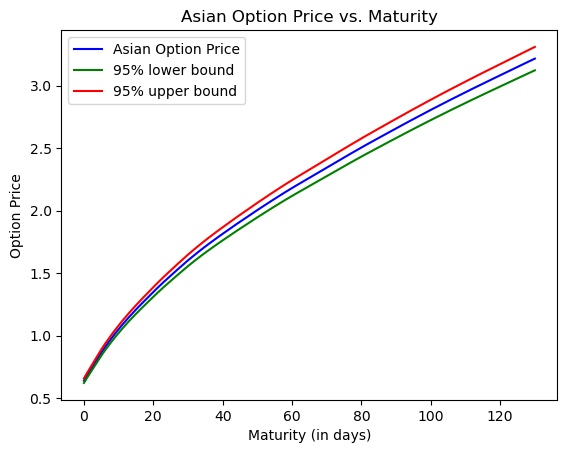

In [29]:
plt.plot(price[1:], label="Asian Option Price", linestyle='-', color='b')
plt.plot(lower_bound[1:], color='green',  label="95% lower bound")
plt.plot(upper_bound[1:], color='red',  label="95% upper bound")
    
plt.title("Asian Option Price vs. Maturity")
plt.xlabel("Maturity (in days)")
plt.ylabel("Option Price")
plt.legend()
plt.show()